In [1]:
import numpy as np
import pandas as pd

from model_layer import LeNet5, LeNet5Imp
from toolbox import *

In [2]:
def get_hyper(txt):
    dict_re = dict()
    txt = txt.split('/')[-1]
    ls_txt = txt.split('_')

    dict_re['v'] = ls_txt[1]
    dict_re['e'] = ls_txt[2][1:]
    dict_re['b'] = ls_txt[3][1:]
    dict_re['lr'] = ls_txt[4][2:-4]
    return dict_re

In [3]:
def testing(model, weight_path, test_X, test_y):    
    with open(weight_path, 'rb') as f:
        model.set_params(params=pickle.load(f))
    test_y_pred = model.forward(test_X)
    test_acc = (test_y_pred.argmax(axis=1) == test_y.argmax(axis=1)).sum() / test_y.shape[0]
    print('Test ACC: ', test_acc)

In [4]:
test_X, test_y = read_pixel_data(part='test')
test_X = test_X / float(255)
test_X -= np.mean(test_X)
test_y = one_hot_encoding(test_y, 50)

val_X, val_y = read_pixel_data(part='val')
val_X = val_X / float(255)
val_X -= np.mean(val_X)
val_y = one_hot_encoding(val_y, 50)

100%|██████████| 450/450 [00:00<00:00, 15929.48it/s]


## Original LeNet

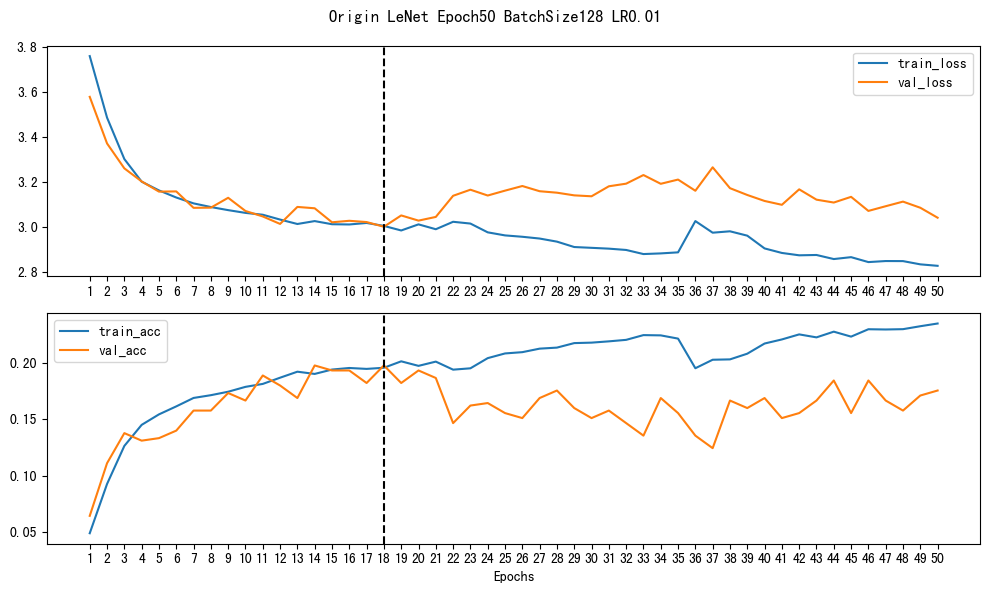

In [5]:
filename = 'output/lenet_origin_e50_b128_lr0.01.csv'
hyper_dict = get_hyper(filename)

df_e50 = pd.read_csv(filename)
draw_loss_n_save(df_e50.values, hyper_dict)

In [6]:
mask = (df_e50['val_loss'].argmin())
df_e50.loc[mask]

train_loss    3.006185
train_acc     0.195724
val_loss      3.002469
val_acc       0.197778
Name: 17, dtype: float64

In [7]:
model = LeNet5()
testing(model, 'model_weights/lenet_origin_e50_b128_lr0.01_weights.pkl', test_X, test_y)


Test ACC:  0.1711111111111111


## Improved LeNet

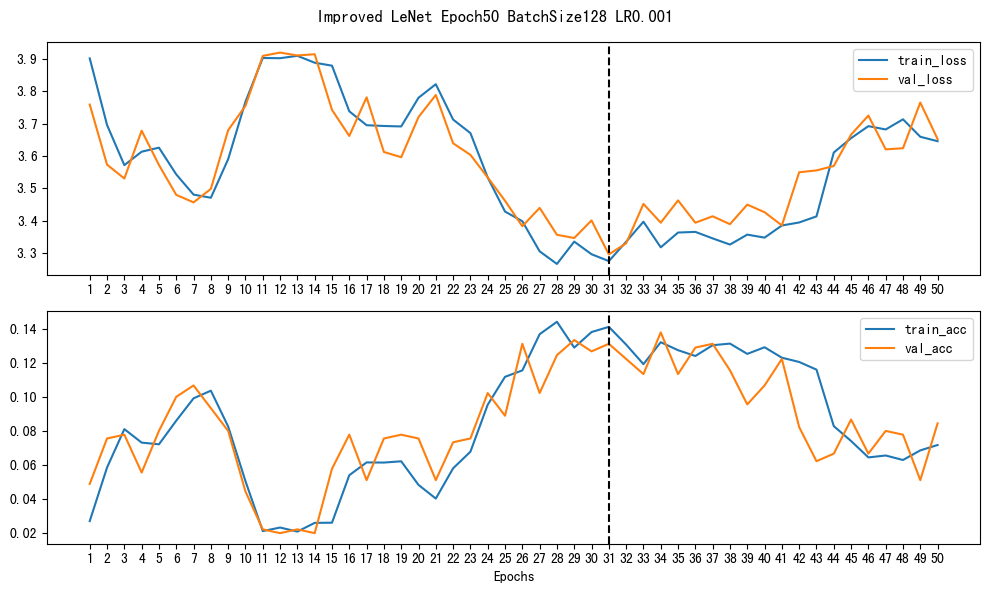

In [15]:
filename = 'output/lenet_improved_e50_b128_lr0.001.csv'
hyper_dict = get_hyper(filename)

df_im_e50 = pd.read_csv(filename)
draw_loss_n_save(df_im_e50.values, hyper_dict)

In [16]:
mask = (df_im_e50['val_loss'].argmin())
df_im_e50.loc[mask]

train_loss    3.275574
train_acc     0.141052
val_loss      3.296159
val_acc       0.131111
Name: 30, dtype: float64

In [17]:
model = LeNet5Imp()
testing(model, 'model_weights/lenet_improved_e50_b128_lr0.001_weights.pkl', test_X, test_y)

Test ACC:  0.12222222222222222
